Paso 1. Entender el problema

En este paso notamos como se debe resolver el problema por medio de una serie de Fourier. Para poder resolver un problema de EDP por Fourier se debe aseguar tener las condiciones frontera que permitan evaluar la funcion para cada termino de la sumatoria infinita. El enunciado del problema nos adelanta dicha tarea y plantea el calculo de An como:

$An   = \frac{1}{sinh(n\pi)} \int_{0}^{L} U(x, L) \cdot sin(n \pi x / L) \cdot dx $

Tenemos por otro lado:

$U(x, L) = 25 + \frac{75 x}{L} $

Y finalmente se define la funcion como la sumatoria de terminos:

$ \sum_{n=1}^{\infty}An sin(\frac{n \pi x}{L}) sinh(\frac{n \pi y}{L})$

Paso 2. Configurar un plan
Para poder encontrar una aproximación numérica se debe programar las funciones anteriores. Arreglamos una lista entonces que provoque el resultado deseado por el usuario:

-El resultado de An se puede encontrar realizando una integración numérica por medio de la librería científica de Python Scipy, se usa integrate.quad debido a la facilidad de no tener que manejar una lista de numeros sino definir simbólicamente una función a evalua y luego solo pasarle los límites deseados para la respuesta.

-La función de U(x, L) se puede programar en otra función auxiliar que llamaremos potencialUXL.

-Finalmente realizamos una suma por medio de un for, el numero de terminos será discreto por lo que se deberá definir un número de terminos para la función. Se deberán si definir valores de X y Y respectivamente para encontrar y evaluar la sumatoria en cada termino. Se guardará una matriz de dichos valores donde cada valor pertenecerá a un punto espacial específico en dos dimensiones.

-Guardamos la matriz de valores espaciales y de resultados para poder ser graficados.

Paso 3. Ejecución del plan
En la programación del mismo se encontraron varios errores que se pudieron depurar con suficiente fluidez. Por ejemplo, se definió el número de terminos de la sumatoria empezando en 0 hasta el valor, sin embargo esto causó una división entre 0 por lo que se pudo identificar el error rapidamente y modificar el mismo para llegar al valor. Por otro lado recordamos que en la definición de range en Python se define una lista de números discretos desde el límite inferior hasta el límite superior definido -1, por lo que se tiene que sumar uno más para llegar a la aproximación deseada con el número de terminos definido por el usuario. Utilizamos matplotlib para poder observar los resultados de la función en el espacio bidimensional. Al llegar a esta aproximación se ejecuta la función.

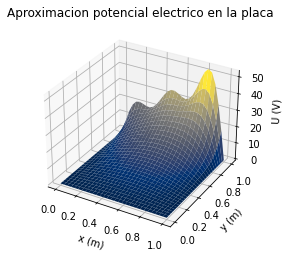

In [11]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np


def potencialUXL(x, L):
    '''

    :param x: parametro dimensional variable en X espacial para el borde de Y=L
    :param L: constante donde se evalua Y para definir los valores de z en la arista
    :return: resultado de la evaluacion
    '''
    resultado = 25 + (75 * x/L) #V
    return resultado

def calculoAn(n, L):
    '''

    :param n: el termino de An que se calculara, es un numero entero requerido de 0 a infinito
    :param L: la arista donde se define la funcion para poder encontrar la solucion al EDP
    :return: resultado de An para n especifico entero discreto
    '''
    #Se define este lamX por medio de un Lambda para poder utilizar x variable
    lamX = lambda x: potencialUXL(x, L) * np.sin(n * np.pi * x / L)
    #La funcion de quad requiere unicamente funcion de x y los limites
    integral = integrate.quad(lamX, 0, L)
    constante = 1 / np.sinh(n * np.pi)
    resultado = constante * integral[0]
    return resultado

def aproximacionUXY(numeroTerminos, x, y, L):
    '''

    :param numeroTerminos: el numero de terminos finito en los que se desea aproximar la EDP
    :param x: la lista de valores de la matriz en el espacio de x
    :param y: la lista de valores de la matriz en el espacio de y
    :param L: el valor de la arista de la grafica de la funcion
    :return: una matriz de valores que dependen de el espacio bidimensional seleccionado
    '''
    resultado = 0
    #Define la sumatoria
    for termino in range(1, numeroTerminos+1):
        an = calculoAn(termino, L)
        resultado += an * np.sin(termino * np.pi * x / L) * np.sinh(termino * np.pi * y / L)
    return resultado

# Se define la arista como L, la cantidad de puntos espaciales en la dimension y el numero de terminos de la aproximacion
L = 1
dimension = 30
numeroTerminos = 5
#Una lista para X y Y con puntos definidos entre 0 y L para la cantidad que se requiera
x = np.linspace(0, L, dimension)
y = np.linspace(0, L, dimension)
#Convertimos las listas en una matriz para graficar y luego se guardan estos puntos en las siguientes variables
X, Y = np.meshgrid(x, y)
#Se almacena el voltaje de la placa en la variable de "altura", Z
Z = aproximacionUXY(numeroTerminos, X, Y, L)

#Se grafican los resultados usando la libreria matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('U (V)')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
ax.set_title('Aproximacion potencial electrico en la placa')
plt.show()

Paso 4. Mirar hacia atras
Notamos como de forma visual la solución al enunciado coincide con la presentada por el profesor. Iteramos y tambien notamos que un número de terminos mayor genera una grafica con mejor aproximación. Sin embargo, es importante poder iterar esta aproximación con el numero de terminos deseados para la resolución espacial deseada por lo que se agrega un código apendice donde se intenta corregir esto para mayor facilidad para el usuario y un mejor manejo de errores.

Valor debe ser numérico


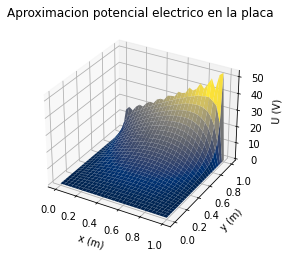

In [15]:
def definirNumeroTerminos():
    # Funcion de manera recursiva maneja errores del usuario por ejemplo que la entrada no sea numerica o que se definan 0 terminos.
    #Si se define un numero de tipo flotante los decimales no serán tomados en cuenta
    try:
        numero = int(input("Defina el numero de terminos de la aproximación: "))
        if(numero == 0):
            return definirNumeroTerminos()
        else:
            return numero
    except:
        print("Valor debe ser numérico")
        return definirNumeroTerminos()


# Se define la arista como L, la cantidad de puntos espaciales en la dimension y el numero de terminos de la aproximacion
L = 1
dimension = 30
numeroTerminos = definirNumeroTerminos()
#Una lista para X y Y con puntos definidos entre 0 y L para la cantidad que se requiera
x = np.linspace(0, L, dimension)
y = np.linspace(0, L, dimension)
#Convertimos las listas en una matriz para graficar y luego se guardan estos puntos en las siguientes variables
X, Y = np.meshgrid(x, y)
#Se almacena el voltaje de la placa en la variable de "altura", Z
Z = aproximacionUXY(numeroTerminos, X, Y, L)

#Se grafican los resultados usando la libreria matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('U (V)')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
ax.set_title('Aproximacion potencial electrico en la placa')
plt.show()